# Optics Demo

In [1]:
from discopy.quantum.optics import evaluate
from discopy.quantum.zx import circuit2zx, decomp, Z
from discopy import drawing

## Dual Rail Encoding of a Fusion Measurement

$$ \textbf{Fuse}_{ZX} =|0\rangle\langle 00| + |1\rangle\langle 11| $$

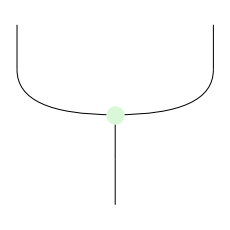

In [2]:
Z(2, 1).draw(figsize=(3, 3))

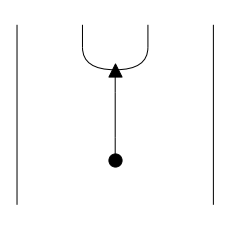

In [3]:
from discopy.quantum.optics import zx_to_path
path_bell = zx_to_path(Z(2, 1))
path_bell.draw(draw_type_labels=False, figsize=(3, 3))

In [4]:
print('Amplitude of |00><0|', evaluate(path_bell, [1, 0, 1, 0], [1, 0]))
print('Amplitude of |11><1|', evaluate(path_bell, [0, 1, 0, 1], [0, 1]))
print('Amplitude of |10><1|', evaluate(path_bell, [0, 1, 1, 0], [0, 1]))

inp=[1, 0, 1, 0] out=[1, 1, 0]
Amplitude of |00><0| 1.0
inp=[0, 1, 0, 1] out=[0, 1, 1]
Amplitude of |11><1| 1.0
inp=[0, 1, 1, 0] out=[0, 1, 1]
Amplitude of |10><1| 0.0


## Dual Rail Encoding of Bell state

$$ \textbf{Bell}_{ZX} =|00\rangle + |11\rangle $$

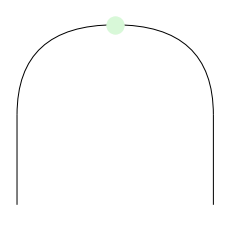

In [5]:
Z(0, 2).draw(figsize=(3, 3))

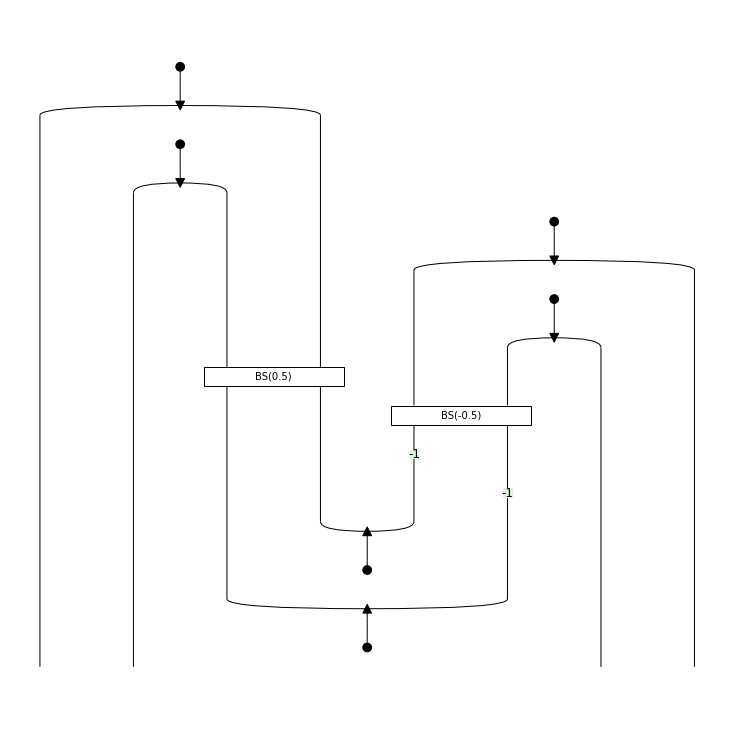

In [6]:
path_bell = zx_to_path(Z(0, 2))
path_bell.draw(draw_type_labels=False, figsize=(10, 10))

In [7]:
# |00> + |11> (unnormalised)
print('Amplitude of |00>', evaluate(path_bell, [], [1, 0, 1, 0]))
print('Amplitude of |01>', evaluate(path_bell, [], [1, 0, 0, 1]))
print('Amplitude of |10>', evaluate(path_bell, [], [0, 1, 1, 0]))
print('Amplitude of |11>', evaluate(path_bell, [], [0, 1, 0, 1]))

print('Nonsense 1: (out of dual rail) -> 0', evaluate(path_bell, [], [0, 0, 0, 2]))
print('Nonsense 2: (out of dual rail) -> 0', evaluate(path_bell, [], [1, 1, 0, 0]))
print('Nonsense 3: (out of dual rail)', evaluate(path_bell, [], [1, 2, 3, 4]))

inp=[1, 1, 1, 1] out=[1, 0, 1, 1, 1, 0]
Amplitude of |00> (1+0j)
inp=[1, 1, 1, 1] out=[1, 0, 1, 1, 0, 1]
Amplitude of |01> 0j
inp=[1, 1, 1, 1] out=[0, 1, 1, 1, 1, 0]
Amplitude of |10> 0j
inp=[1, 1, 1, 1] out=[0, 1, 1, 1, 0, 1]
Amplitude of |11> (1+0j)
inp=[1, 1, 1, 1] out=[0, 0, 1, 1, 0, 2]
Nonsense 1: (out of dual rail) -> 0 0j
inp=[1, 1, 1, 1] out=[1, 1, 1, 1, 0, 0]
Nonsense 2: (out of dual rail) -> 0 (-2.220446049250313e-16+0j)
inp=[1, 1, 1, 1] out=[1, 2, 1, 1, 3, 4]


ValueError: # of photons in != # of photons out

## Dual Rail Encoding of GHZ state

$$ \textbf{GHZ}_{ZX} =|000\rangle + |111\rangle $$

In [ ]:
ghz = Z(0, 3)
decomp_ghz = decomp(ghz)
drawing.equation(ghz, decomp_ghz, symbol='->')

In [ ]:
from discopy.quantum.optics import *
path_ghz = zx_to_path(decomp_ghz)
path_ghz.draw(draw_type_labels=False, figsize=(10, 10))

In [ ]:
evaluate(path_ghz, [], [0, 1, 0, 1, 0, 1])

## Dual Rail Encoding of CNOT

$$ \textbf{CNOT}_{ZX} = \sqrt{2}\:\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix} $$

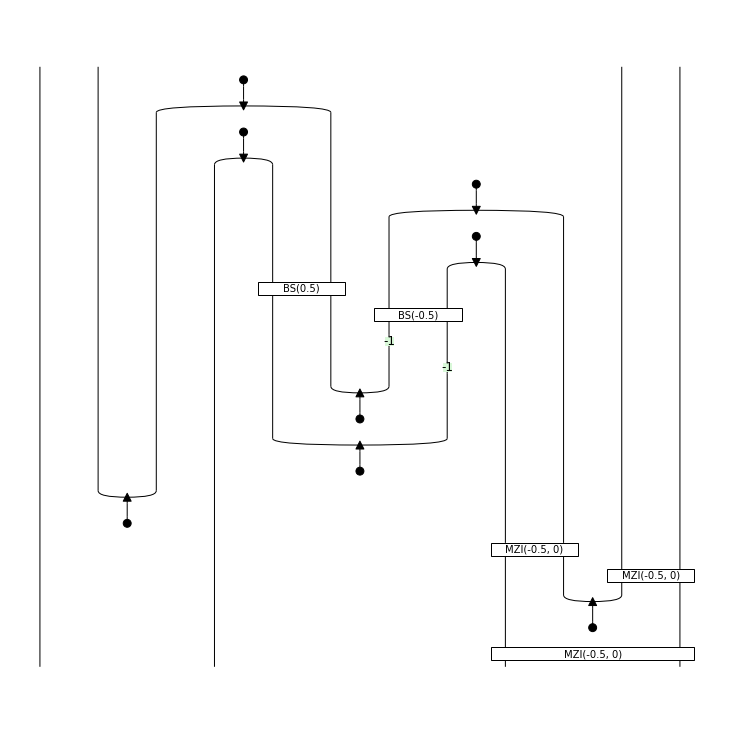

In [8]:
from discopy import CX
circ = CX
d_path = zx_to_path(decomp(circuit2zx(CX)))

d_path.draw(draw_type_labels=False, figsize=(10, 10))

In [9]:
print("CNOT: |10> -> |11>", evaluate(d_path, [0, 1, 1, 0], [0, 1, 0, 1]))
print("CNOT: |11> -/-> |11>", evaluate(d_path, [0, 1, 0, 1], [0, 1, 0, 1]))

inp=[0, 1, 1, 1, 1, 1, 1, 0] out=[0, 1, 1, 1, 1, 0, 1, 1]
CNOT: |10> -> |11> (0.7071067811865476+0j)
inp=[0, 1, 1, 1, 1, 1, 0, 1] out=[0, 1, 1, 1, 1, 0, 1, 1]
CNOT: |11> -/-> |11> (1.942890293094024e-16+0j)


## Interfaces (tket / pyzx / perceval)

In [10]:
import perceval as pcvl
from discopy.quantum.optics import BeamSplitter

def to_perceval(self):
    return pcvl.Matrix(self.array)

bs = BeamSplitter(0.5)

backend = pcvl.BackendFactory().get_backend()
simulator = backend(to_perceval(bs))

# Hong-Ou-Mandel effect
for _ in range(10):
   print(simulator.sample(pcvl.BasicState("|1,1>")))

|0,2>
|2,0>
|0,2>
|0,2>
|0,2>
|2,0>
|0,2>
|0,2>
|2,0>
|2,0>


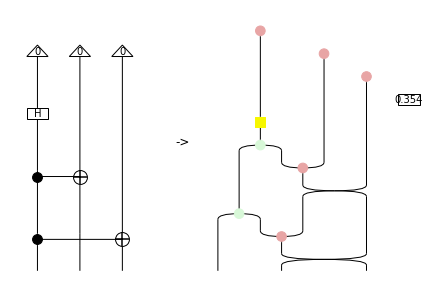

In [11]:
from discopy.quantum import Ket

circ = Ket(0, 0, 0).H(0).CX(0, 1).CX(0, 2)
zx_circ = circuit2zx(circ)
drawing.equation(circ, zx_circ, symbol='->')

In [12]:
import pyzx as zx

g = zx_circ.to_pyzx()
zx.drawing.draw_d3(g)
zx.clifford_simp(g)
zx.drawing.draw_d3(g)